# Sun Path Diagram for any given location or latitude on earth

## Executive Summary

A Sun Path Diagram can help building environment designers gather information about how the sun will impact the building site throughout the year. It is used to determine the day of the year and hour of day when shading will take place at a location of interest. Below you can see a figure showing the sun path on three days of the year in the northern hemisphere. Going from right to left, three paths are shown, one being for the summer solstice, the next one for equinoxes and the last one for winter solstice. A Sun Path Diagram represents four parameters related to the position of the sun over a particular location and they are: hour, day, azimuth and altitude. 

![](./sun_path_expl.gif)
*[Visualisation of a 3D Sun Path Diagram](http://friskykcollyer.blogspot.co.uk/2010/06/sun−path.html) \[Accessed 20 April 2016\]*

This program is designed to automatically draw a Sun Path Diagram for a location of interest, by inputting the location (the latitude of which is determined using the Google Maps API) or by inputting the latitude of the location of interest.

## Method

#### Calculating hour angles (H)
Hour angle is the angle the Earth needs to rotate to bring the meridian to noon. We need to calculate this for every hour in the day, in order to be able to calculate the altitude of the sun at every hour of the day.
The formula used to calculate the Hour angle is: $H = 15\times(T-12)$, where $T$ is the time in a 24 hour format.

#### Calculating declinations (D)
Declination is the angle of the sun's rays to the equatorial plane and it is positive in the summer. Declinations for 3-5 days in a year need to be calculated in order to be able build a sunpath diagram. In this program declinations for 5 days of the year have been calculated, for completness. Two of the days are summer and winter solstices and the rest are days evenly spaced between the solstices, including either of the equinoxes (declination for both equinoxes is the same: 0). The formula used to calculate the Declination is: 

$$D=23.4\times\sin\times\Bigg(\frac{360\times(284+N)}{365}\Bigg) $$
$N$ - is the day number in a year (example: 1st of February is 32)

#### Calculating altitudes ($\gamma$)
When we have all the required values for hour angles and declinations from the above formulas, we can start calculating the altitudes of the sun during the day, on each of the five days chosen. The formula used to calculate the altitude is the following:

$$\sin(\gamma)=\cos(D)\times\cos(L)\times\cos(H)+\sin(D)\times\sin(L)$$
which rearranged is:

$$\gamma = \arcsin(\cos(D)\times\cos(L)\times\cos(H)+\sin(D)\times\sin(L))$$

$\gamma$ - Altitude

$D$ - Declination

$L$ - Latitude

$H$ - Hour angle

Five lists of altitudes of the sun are created, with values of altitude at every hour in a 24 hour period, of each one of the five days. Those lists are then later used to plot the altitudes on the Sunpath Diagram.

#### Calculating azimuths (z) for each hour of each one of the five days chosen.
The formula used to calculate the azimuths for each given altitude of the sun is displayed below:

$$\cos(z) = \frac{\sin(D)\times\cos(L)-\cos(D)\times\sin(L)\times\cos(H)}{\cos(\gamma)}$$
which rearranged is:

$$z=\arccos\bigg(\frac{\sin(D)\times\cos(L)-\cos(D)\times\sin(L)\times\cos(H)}{\cos(\gamma)}\bigg)$$

This formula calculates azimuth clockwise or anticlockwise from north up to 180 degrees. However for the purpose of this program azimuths needed to go up to 360 degrees to be able to plot them, so in order to calculate the azimuth clockwise from north the azimuth calulated has been subtracted from 360. Then lists of azimuths had to be built of lenght 25, with each value of azimuth in the lists matching the corresponding value under the same index in the lists of altitudes. The code below works through this process and works for both positive and negative latitudes.



## Comments on the programming code
All code has been written in Python 2.7. In the code I have used matplotlib basemap toolkit, which is a library for plotting 2D data on maps in Python. Alghogh there was no need to printed data on maps, basemap toolkit proved to be usefuk to help transform coordinates to a different map projection. Then Matplotlib was used to plot the rest of the required data. The installation for the basemap toolkit can be found by clicking on this link: http://matplotlib.org/basemap/users/download.html \[Accessed 20 April 2016\].

Also Google Geodata API was used to determine the latitude of the location typed in by the user. The code takes the search string and constructs a URL as an encoded parameter and then uses urllib to retrieve the text from the Google geocoding API. The data received depends on the parameters sent and the geographical data stored in Google’s servers. When JSON data is retreived, it is parsed with the json library and a few checks are done, to make sure that data received is usable format and then the latitude coordinate is extracted for the purpose of the program.

The programming code asks the user for a location or a latitude, then calculates lists of altitudes and azimuths throughout the year. Once all the lists are complete, all the points are plotted on the Sun Path Diagram.

Enter location or latitude: Mombasa, Kenya
The sunpath diagram displayed is for latitude: -4.0434771


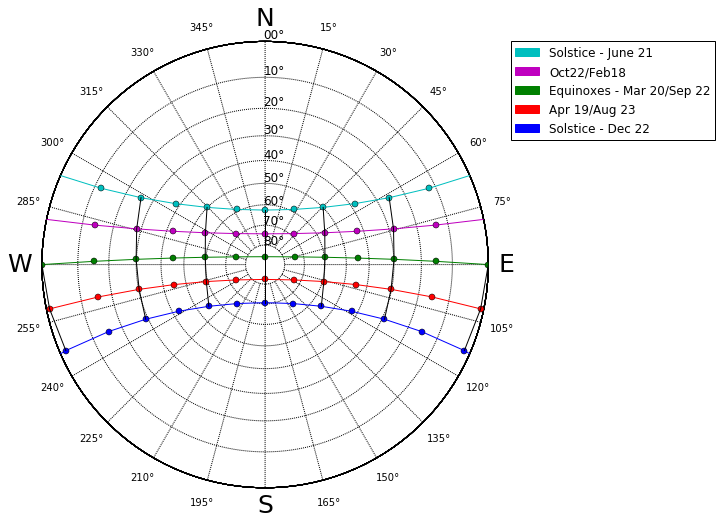

In [3]:
#finding latitude of a location on Earth, using Google geodata API, by inputing its name
def latitude(location):
    import urllib
    import json
    serviceurl = 'http://maps.googleapis.com/maps/api/geocode/json?'
    while True:
        address = location
        if len(address) < 1 : break
        url = serviceurl + urllib.urlencode({'sensor':'false',
                                         'address': address})
    
        uh = urllib.urlopen(url)
        data = uh.read()
        try: js = json.loads(str(data))
        except: js = None
        if 'status' not in js or js['status'] != 'OK':
            print '==== Failure To Retrieve ===='
            continue
        lat = js["results"][0]["geometry"]["location"]["lat"]
        return lat
        break
## API code taken from
##Severance, C., 2013. Python for Informatics: Exploring Information

#defining several functions to make it easier to use them for the latter code
import numpy as np

pi=np.pi

def sin(x):
    return np.sin(np.deg2rad(x))

def cos(x):
    return np.cos(np.deg2rad(x))

def arcsin(x):
    return np.arcsin(x)*(180.0/pi)

def arccos(x):
    return np.rad2deg(np.arccos(x))

def is_number(s): #this function is designed to identify if argument x is a number
    try:
        float(s)
        return True
    except ValueError:
        return False

#lets the user to type in a location or a latitude, for which the sunpath diagram will be constructed
#restricts the user to input latitudes out of the range -90 to 90
z = raw_input('Enter location or latitude: ')  #z is the inputed value by the user
L=0

        
if  is_number(z)==True: # this identifies if the inputed value is a number
    if (-90)<=float(z) <= 90.0:
        L=float(z)
    elif float(z)>90 or float(z)<(-90):
        L = float(raw_input('Please enter a value for latitude in a range from -90 to 90: '))
        while L>90 or L<(-90):        
            L = float(raw_input('Please enter a value for latitude in a range from -90 to 90: '))
else:
    L=latitude(z)   
print "The sunpath diagram displayed is for latitude:",L


T = range(0,25,1) #hours at which we are measuring azimuth and altitude

H = [] #Hour Angle empty list which will be appended with 24 values produced from the formula shown in the method section above
for x in T:
    h = 15*(x-12)
    H.append(h)

N = [354.75,293.75,81,111.25,172.25] # days in the year we are taking the measurements

D=[]
for x in N:
    d = 23.4*sin((360.0*(284.0+x))/365.0)
    D.append(d)


#Calculating altiutude at all hour angles
altitude1 = []
for x in H:
    alt=arcsin(cos(D[0])*cos(L)*cos(x)+sin(D[0])*sin(L))
    altitude1.append(alt)

altitude2 = []
for x in H:
    alt=arcsin(cos(D[1])*cos(L)*cos(x)+sin(D[1])*sin(L))
    altitude2.append(alt)
    
altitude3 = []
for x in H:
    alt=arcsin(cos(D[2])*cos(L)*cos(x)+sin(D[2])*sin(L))
    altitude3.append(alt)
    
altitude4 = []
for x in H:
    alt=arcsin(cos(D[3])*cos(L)*cos(x)+sin(D[3])*sin(L))
    altitude4.append(alt)

altitude5 = []
for x in H:
    alt=arcsin(cos(D[4])*cos(L)*cos(x)+sin(D[4])*sin(L))
    altitude5.append(alt)

np.seterr(divide='ignore', invalid='ignore') # this is written to avoid getting errors when nan is displayed in a list

#defining formula to calculate azimuths for each of the above calculated altitudes 
def azimuth(altitude,declination_index):

    n=0
    m_az=[]
    e_az=[]
    while n <len(altitude):
        morn_az=arccos((sin(D[declination_index])*cos(L)-cos(D[declination_index])*sin(L)*cos(H[n]))/cos(altitude[n]))
        evenin_az=360-morn_az
        n=n+1
        m_az.append(morn_az)
        e_az.append(evenin_az)

    morning_az_list = m_az[:((len(m_az)+1)/2)] #the first half of the list m_az is cut out, because those are the values 
                                               # of the azimuths from midnight up to the noon
    
    evening_az_list = e_az[(((len(e_az))-1)/2):]#the second half of the list e_az is cut out, because those are the values
                                                #of the azimuths in the afternoon up to the midnight
    az_list = morning_az_list+evening_az_list   #both lists are combined 
    
    del(az_list[13])              #value under index 13 is deleted because it is doubled, as it is the same in both lists
    az_list = [0.0 if np.isnan(x) else x for x in az_list]#if any of the values in the list is displayed as nan, replace it with zero

    if abs(az_list[12]-az_list[11])>100:#if the difference between the middle azimuth and the preious is more than a hundred
        del(az_list[12])                #delete the middle item
        az_list.insert(12,180.0)        #replace it with 180
        
    if L<0:                             #if latitude is negarive than delete the first and last term and replace it with 180
        del(az_list[0])
        az_list.insert(0,180)
        del(az_list[24])
        az_list.insert(24,180)
    return az_list


#calculating azimuths by calling the azimuth function defined above
azimuth1=azimuth(altitude1,0)

azimuth2=azimuth(altitude2,1)

azimuth3=azimuth(altitude3,2)

azimuth4=azimuth(altitude4,3)

azimuth5=azimuth(altitude5,4)


%matplotlib inline
import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap

# create instance of basemap, with south polar projection to 90 = E
testFig = plt.figure(1, figsize=(13,8)) # dimensions of the figure (to include the legend on the side)
Diagram = Basemap(projection='spstere',boundinglat=0,lon_0=180,resolution='l',round=True,suppress_ticks=True)
# set the grid up
gridX,gridY = 10.0,15.0
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)


# draw parallel and meridian grid with all labels off. I have manually created this in the code below
Diagram.drawparallels(parallelGrid,labels=[False,False,False,False])
Diagram.drawmeridians(meridianGrid,labels=[False,False,False,False],labelstyle='+/-',fmt='%i')


# plot azimuth labels, with N,S,E,W labels
ax = plt.gca()
for para in np.arange(gridY,360,gridY):
    x= (1.1*0.5*sin(para))+0.5
    y= (1.1*0.5*cos(para))+0.5
    if  para!=90 and para!=180 and para!=270:# this is to restrict printing azimuth labels at 90,180,270
                                             # because labels of N,S,E,W will be in that place           
        ax.text(x,y,u'%i\N{DEGREE SIGN}'%para,transform=ax.transAxes,horizontalalignment='center',verticalalignment='center')
    else:
        continue
ax.text(0.5,1.025,'N',transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=25)
ax.text(1.04,0.475,'E',transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=25)
ax.text(0.5,-0.065,'S',transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=25)
ax.text(-0.05,0.475,'W',transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=25)
##this section of the code above is an improvement on the code from this link: 
##stackoverflow.com/questions/12858806/stereographic-sun-diagram-matplotlib-polar-plot-python


#plot altitude labels
ax.text(0.520,1,u'%s\N{DEGREE SIGN}'%'00',transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=12)
ax.text(0.520,0.920,u'%i\N{DEGREE SIGN}'%10,transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=12)
ax.text(0.520,0.850,u'%i\N{DEGREE SIGN}'%20,transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=12)
ax.text(0.520,0.787,u'%i\N{DEGREE SIGN}'%30,transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=12)
ax.text(0.520,0.732,u'%i\N{DEGREE SIGN}'%40,transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=12)
ax.text(0.520,0.680,u'%i\N{DEGREE SIGN}'%50,transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=12)
ax.text(0.520,0.630,u'%i\N{DEGREE SIGN}'%60,transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=12)
ax.text(0.520,0.585,u'%i\N{DEGREE SIGN}'%70,transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=12)
ax.text(0.520,0.540,u'%i\N{DEGREE SIGN}'%80,transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=12)


#print the legend for the diagram
import matplotlib.patches as mpatches
from pylab import *
red_patch= mpatches.Patch(color="r",label = "Apr 19/Aug 23")
blue_patch = mpatches.Patch(color="b",label = "Solstice - Dec 22")
green_patch = mpatches.Patch(color ='g',label = 'Equinoxes - Mar 20/Sep 22')
magenta_patch = mpatches.Patch(color = 'm',label = 'Oct22/Feb18')
cyan_patch = mpatches.Patch(color='c',label = 'Solstice - June 21')
plt.legend(handles=[cyan_patch,magenta_patch,green_patch,red_patch,blue_patch],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


#definition of a function to plot aziumth,altitude points with an additional attribute of colour
def plot(azimuth, altitude,colour):
    azi_list=[]
    alt_list=[]
    n=0
    for n in range(len(azimuth)):
        azi,alt = Diagram(azimuth[n], -altitude[n])
        n=n+1
        azi_list.append(azi)
        alt_list.append(alt)
    Diagram.plot(azi_list,alt_list,colour)

    
#call the function defined above on the lists of altitudes and azimuths calculated earlier
plot(azimuth1,altitude1,'bo-')
plot(azimuth2,altitude2,'ro-')
plot(azimuth3,altitude3,'go-')
plot(azimuth4,altitude4,'mo-')
plot(azimuth5,altitude5,'co-')

#defining a function to plot the hour lines
def alt_hour_line(hour):
    lst1 = [altitude1,altitude2,altitude3,altitude4,altitude5]
    lst2 = [azimuth1,azimuth2,azimuth3,azimuth4,azimuth5]
    alt_hour=[]
    for x in lst1:
        alt_hour.append(x[hour])
    az_hour=[]
    for x in lst2:
        az_hour.append(x[hour])
    plot(az_hour,alt_hour,'k-')

#calling a function on plotting the hour lines for the hours in the range given below
for x in range(0,25,2):
    alt_hour_line(x)

plt.savefig('sunpath_diagram.png')
plt.show()